# Discovery of Non-Linear Double Pendulum Dynamics using SODAs: Plotting

In [6]:
import os, sys

path_to_add = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(path_to_add)
print(os.path.join(path_to_add, "daeFinder"))
sys.path.append(os.path.join(path_to_add, "daeFinder"))


import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator
import sympy
from dae_finder import construct_reduced_fit_list

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp




from matplotlib import pyplot as plt
from dae_finder import smooth_data
from dae_finder import add_noise_to_df
from sklearn import decomposition
from sklearn.linear_model import LinearRegression
from dae_finder import get_simplified_equation_list
from dae_finder import get_refined_lib, remove_paranth_from_feat
from dae_finder import AlgModelFinder
from dae_finder import sequentialThLin, AlgModelFinder
from dae_finder import PolyFeatureMatrix
from copy import deepcopy



/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder


## Loading data

In [7]:

# Loading pendulum data
df_list = []
for ind in [3]:
    file_path = f"data/double_pendulum_{ind}.csv"
    df = pd.read_csv(file_path)
    df_list.append(df)

# trimming_slices=  [(10,700), (10,700), (10,700), (10,700), (10,700)]
# trimming_slices=  [(0,100), (0,100), (0,100), (0,100), (0,100)]
trimming_slices = [(2,-2), (2,-2)]


df_trimmed = []
for df_, slice in zip(df_list, trimming_slices):
    df_trimmed.append(df_[slice[0]:slice[1]].reset_index(drop=True))

#centering the hook of pendulum to origin
center = (963.5, 750)
color = [120, 255, 243]
for df_ in df_trimmed:
    df_["x_1"] = df_["X1"] - center[0]
    df_["y_1"] = -(df_["Y1"] - center[1])
    df_["x_2"] = df_["X2"] - center[0]
    df_["y_2"] = -(df_["Y2"] - center[1])


# for i, df in enumerate(df_trimmed):
#     df.to_csv(f"data/double_pendulum_trimmed_{i+1}.csv", index=False)

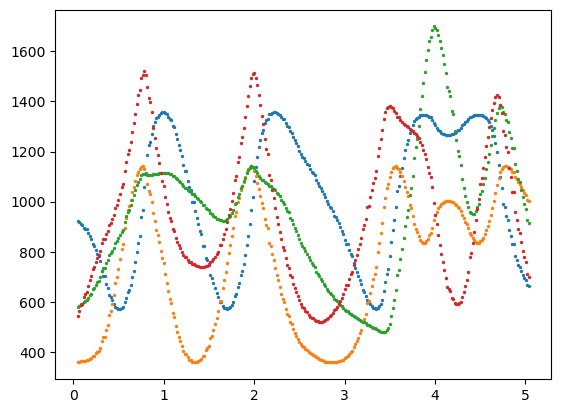

In [8]:
L=1  
smoothening_window_size = 15
pen_orig_len = abs(df_trimmed[0]["y_1"]).max()
#Scaling the pendulum length to L
for df_ in df_trimmed:
    df_["x_1"] = (df_["x_1"]/pen_orig_len) * L
    df_["y_1"] = (df_["y_1"]/pen_orig_len) * L
    df_["x_2"] = (df_["x_2"]/pen_orig_len) * L
    df_["y_2"] = (df_["y_2"]/pen_orig_len) * L

    # df_["x"] = df_["x"].rolling(window=smoothening_window_size, center=True).mean()
    # df_["y"] = df_["y"].rolling(window=smoothening_window_size, center=True).mean()

    # df_["theta"] = np.arctan2(df_["y"], df_["x"])
    # df_["theta"] = (np.arctan2(df_["y"], df_["x"])).rolling(window=smoothening_window_size, center=True).mean()
    # df_.dropna(ignore_index=True, inplace=True)

df_appended = pd.concat(df_trimmed, ignore_index=True)

for df_ in df_trimmed:

    # df_[["x_1", "y_1", "x_2", "y_2"]][:100].plot()
    # for feat in ["x_1", "y_1", "x_2", "y_2"]:
    for feat in ["X1", "Y1", "X2", "Y2"]:
        plt.scatter(df_["t"][:300], df_[feat][:300], s=2)
        # plt.plot(df_["t"][:300], df_[feat][:300], ".-")

    # df_[["x_2", "y_2"]].plot()



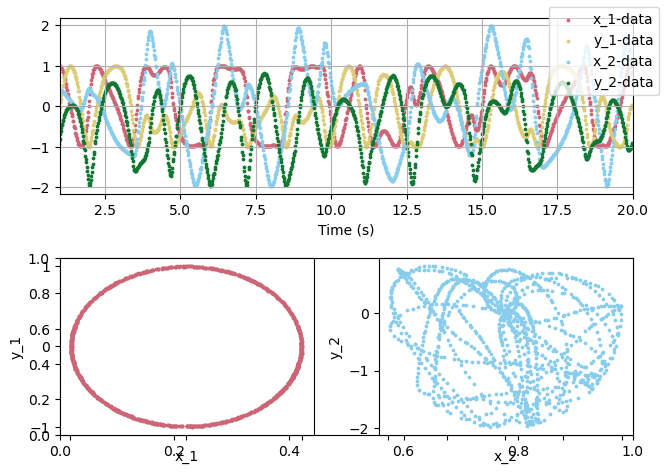

In [30]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))

# First row: scatter plot of t vs x_1, y_1, x_2, y_2
df_subset = df_trimmed[0][(df_trimmed[0]['t'] >= 0.2) & (df_trimmed[0]['t'] <= 20)]

ax1.scatter(df_subset['t'], df_subset['x_1'], label='x_1-data', s=3, color='#CC6677')
ax1.scatter(df_subset['t'], df_subset['y_1'], label='y_1-data', s=3, color='#DDCC77')
ax1.scatter(df_subset['t'], df_subset['x_2'], label='x_2-data', s=3, color='#88CCEE')
ax1.scatter(df_subset['t'], df_subset['y_2'], label='y_2-data', s=3, color='#117733')

ax1.set_xlabel('Time (s)')
ax1.grid(True)
ax1.set_xlim(left=1)
ax1.set_xlim(right=20)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Second row, first column: scatter plot of x_1 vs y_1
ax2_1 = plt.subplot(2, 2, 3)
ax2_1.scatter(df_subset['x_1'], df_subset['y_1'], label='x_1 vs y_1', s=3, color='#CC6677')
ax2_1.set_xlabel('x_1')
ax2_1.set_ylabel('y_1')
ax2_1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2_1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2_1.set_xticklabels([])  # Remove x-axis markings

# Second row, second column: scatter plot of x_2 vs y_2
ax2_2 = plt.subplot(2, 2, 4)
ax2_2.scatter(df_subset['x_2'], df_subset['y_2'], label='x_2 vs y_2', s=3, color='#88CCEE')
ax2_2.set_xlabel('x_2')
ax2_2.set_ylabel('y_2')
ax2_2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2_2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2_2.set_xticklabels([])  # Remove x-axis markings

plt.savefig('Example_2_pendulum_experiment_data_with_subplots.svg', format='svg')

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))

# First row: scatter plot of t vs x_1, y_1, x_2, y_2
df_subset = df_trimmed[0][(df_trimmed[0]['t'] >= 0.2) & (df_trimmed[0]['t'] <= 20)]

ax1.scatter(df_subset['t'], df_subset['x_1'], label='x_1-data', s=3, color='#CC6677')
ax1.scatter(df_subset['t'], df_subset['y_1'], label='y_1-data', s=3, color='#DDCC77')
ax1.scatter(df_subset['t'], df_subset['x_2'], label='x_2-data', s=3, color='#88CCEE')
ax1.scatter(df_subset['t'], df_subset['y_2'], label='y_2-data', s=3, color='#117733')

ax1.set_xlabel('Time (s)')
ax1.grid(True)
ax1.set_xlim(left=1)
ax1.set_xlim(right=20)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Second row, first column: scatter plot of x_1 vs y_1
ax2_1 = plt.subplot(2, 2, 3)
ax2_1.scatter(df_subset['x_1'], df_subset['y_1'], label='x_1 vs y_1', s=3, color='#CC6677')
ax2_1.set_xlabel('x_1')
ax2_1.set_ylabel('y_1')
ax2_1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2_1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2_1.set_xticklabels([])  # Remove x-axis markings

# Second row, second column: scatter plot of x_2 vs y_2
ax2_2 = plt.subplot(2, 2, 4)
ax2_2.scatter(df_subset['x_2'], df_subset['y_2'], label='x_2 vs y_2', s=3, color='#88CCEE')
ax2_2.set_xlabel('x_2')
ax2_2.set_ylabel('y_2')
ax2_2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2_2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2_2.set_xticklabels([])  # Remove x-axis markings

plt.savefig('Example_2_pendulum_experiment_data_with_subplots.svg', format='svg')

plt.tight_layout()
plt.show()


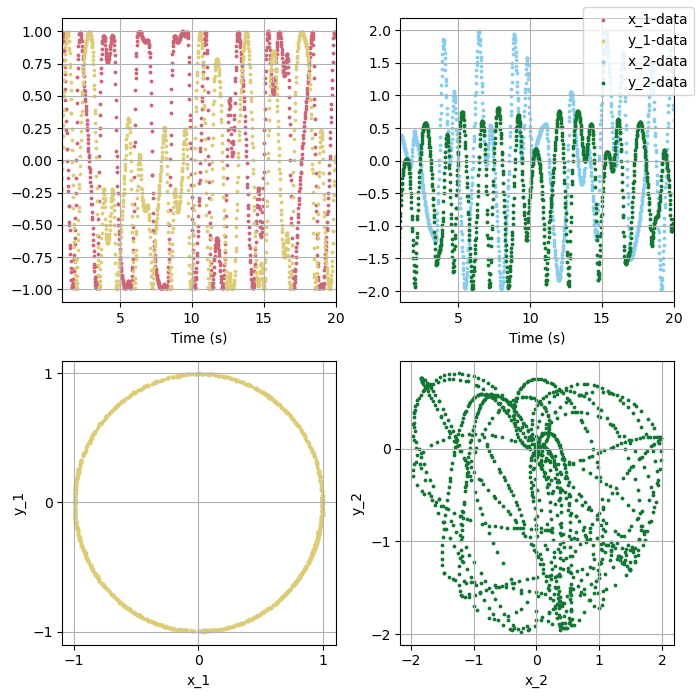

In [43]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(7, 7))  # Create a 2x2 grid directly

# First row: scatter plot of t vs x_1, y_1, x_2, y_2
df_subset = df_trimmed[0][(df_trimmed[0]['t'] >= 0.2) & (df_trimmed[0]['t'] <= 20)]

ax[0, 0].scatter(df_subset['t'], df_subset['x_1'], label='x_1-data', s=3, color='#CC6677')
ax[0, 0].scatter(df_subset['t'], df_subset['y_1'], label='y_1-data', s=3, color='#DDCC77')

ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].grid(True)
ax[0, 0].set_xlim(left=1, right=20)

ax[0, 1].scatter(df_subset['t'], df_subset['x_2'], label='x_2-data', s=3, color='#88CCEE')
ax[0, 1].scatter(df_subset['t'], df_subset['y_2'], label='y_2-data', s=3, color='#117733')
ax[0, 1].set_xlabel('Time (s)')
ax[0, 1].grid(True)
ax[0, 1].set_xlim(left=1, right=20)

# Second row, first column: scatter plot of x_1 vs y_1
ax[1, 0].scatter(df_subset['x_1'], df_subset['y_1'], s=3, color='#DDCC77')
ax[1, 0].set_xlabel('x_1')
ax[1, 0].set_ylabel('y_1')
ax[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
ax[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
ax[1, 0].grid(True)
# ax[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-ticks

# Second row, second column: scatter plot of x_2 vs y_2
ax[1, 1].scatter(df_subset['x_2'], df_subset['y_2'], s=3, color='#117733')
ax[1, 1].set_xlabel('x_2')
ax[1, 1].set_ylabel('y_2')
ax[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
ax[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
# ax[1, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
ax[1, 1].grid(True)

# Adjust layout and legend
fig.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Example_2_double_pendulum_data.svg', format='svg')
plt.show()


In [17]:
(df_appended["x_1"]**2+df_appended["y_1"]**2).std()

0.005745321797176402

<Axes: >

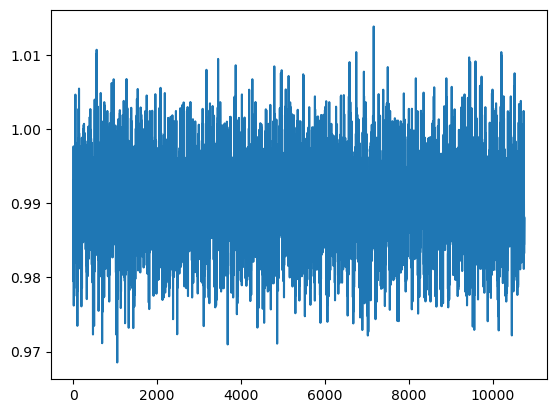

In [18]:
#Visualizing the algebraic constrain in the system
(df_appended["x_1"]**2+df_appended["y_1"]**2).plot()

<Axes: >

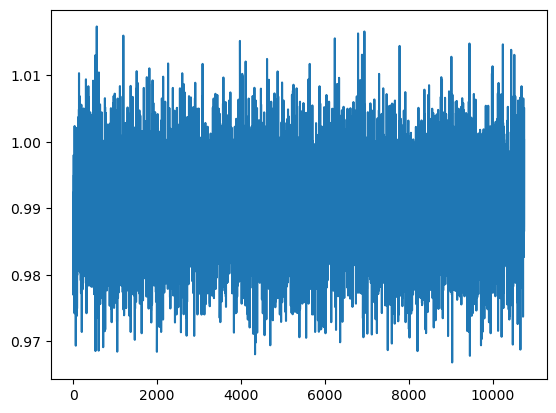

In [19]:
((df_appended["x_1"]-df_appended["x_2"])**2+(df_appended["y_1"]-df_appended["y_2"])**2).plot()

### Smoothening data using Savitzky-Golay Filer

In [20]:
# Finding the first and second order derivative of the states using Savitzky-Golay Filer

data_matrix_smooth_df_list = [
    smooth_data(data_matrix,
                domain_var="t",
                smooth_method ="SG",
                noise_perc=0.1,
                derr_order=2,
                polyorder=2,
                window_smooth=None) #trimming zero derivatives near end points
    for data_matrix in df_trimmed]



if len(data_matrix_smooth_df_list) == 1:
    data_matrix_df_smooth_appended = data_matrix_smooth_df_list[0].reset_index(drop=True)
else:
    data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list, ignore_index=True)

data_matrix_df_new= data_matrix_df_smooth_appended[["x_1", "y_1"]]


# data_matrix_df_new = data_matrix_df_new.rename(columns= dict(zip(data_matrix_df_new, ['theta', 'theta_dot'])))

## Fomring the candidate library

In [80]:
data_matrix_df_new = df_appended[["x_1", "y_1", "x_2", "y_2"]]
data_matrix_df_new = data_matrix_df_new.sample(frac=1).reset_index(drop=True)
# data_matrix_df_new["Y"] = -data_matrix_df_new["Y"]


poly_degree = 5
from daeFinder import PolyFeatureMatrix
poly_feature_ob = PolyFeatureMatrix(poly_degree)
candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_new)
# candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_smooth)





candidate_lib_full = candidate_lib_full.drop(["1"], axis=1)
print("Degree of library: {}".format(poly_degree))
print("# terms in the library: {}".format(candidate_lib_full.shape[1]))

#Optionally removing features from the library
terms_to_drop_corr = set()
candidate_lib_full = candidate_lib_full.drop(terms_to_drop_corr, axis=1)
print("Full candidate library has the following features: {}".format(candidate_lib_full.columns))


Degree of library: 5
# terms in the library: 125
Full candidate library has the following features: Index(['x_1', 'y_1', 'x_2', 'y_2', 'x_1^2', 'x_1 y_1', 'x_1 x_2', 'x_1 y_2',
       'y_1^2', 'y_1 x_2',
       ...
       'y_1 x_2^3 y_2', 'y_1 x_2^2 y_2^2', 'y_1 x_2 y_2^3', 'y_1 y_2^4',
       'x_2^5', 'x_2^4 y_2', 'x_2^3 y_2^2', 'x_2^2 y_2^3', 'x_2 y_2^4',
       'y_2^5'],
      dtype='object', length=125)


## Finding algebraic relationships

In [81]:
from daeFinder import sequentialThLin
from daeFinder import AlgModelFinder
from daeFinder import remove_paranth_from_feat
# Adding the state variables as scipy symbols
# feat_list = list(data_matrix_df_smooth_appended.columns)
feat_list = ["x_1","y_1", "x_2", "y_2"]
feat_list_str = ", ".join(remove_paranth_from_feat(feat_list))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")


down_size = 1000
candidate_lib_downsized = candidate_lib_full.iloc[::down_size, :].reset_index(drop=True)


# seq_th_model = sequentialThLin(fit_intercept=True, alpha=0.2, coef_threshold= 0.1)
seq_th_model = sequentialThLin(fit_intercept=True, alpha=0.2, coef_threshold= 0.1)

# seq_th_model = sequentialThLin(model_id="LR", coef_threshold= 0.2)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob= seq_th_model)

algebraic_model_th.fit(candidate_lib_downsized, scale_columns= True)

algebraic_model_th.best_models()

Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations


/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients f

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations


/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients f

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations


/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients f

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations


/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients f

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations


/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients f

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations


/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients f

,y_1 x_2^3,y_1 x_2^4,x_2 y_2^4,x_2,x_1 y_1 y_2^2,x_2 y_2,x_1 x_2 y_2^3,y_1 x_2^2 y_2^2,x_1 y_2,y_2^4,...,y_1^3 x_2,x_1^2 y_1^2,y_1^3 y_2,x_1^3 y_1,x_1 x_2^3,x_1^3 x_2,y_2^2,x_1 y_1^3,x_2^2,x_1^2 y_1^2 y_2
x_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
y_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
x_2,0.00000000,0.00000000,0.00000000,NaN,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
y_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
x_1^2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x_2^2 y_2^3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
x_2 y_2^4,0.00000000,0.00000000,NaN,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
y_2^5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
y_1 x_2^3,NaN,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


## Finding minimum number of data points required

In [ ]:
poly_degree = 4
from daeFinder import sequentialThLin
from daeFinder import AlgModelFinder
from daeFinder import remove_paranth_from_feat
# Adding the state variables as scipy symbols

In [83]:
best_relationship_dict = {}
from daeFinder import PolyFeatureMatrix
poly_feature_ob = PolyFeatureMatrix(poly_degree)
candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_new)
candidate_lib_full = candidate_lib_full.drop(["1"], axis=1)
print("Degree of library: {}".format(poly_degree))
print("# terms in the library: {}".format(candidate_lib_full.shape[1]))
feat_list = ["x","y", "theta", "theta_dot"]
feat_list_str = ", ".join(remove_paranth_from_feat(feat_list))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")


for num_points in range(40,100,10):
    # data_matrix_df_new = pd.concat([df_[:num_points][["x","y"]] for df_ in df_trimmed])
    # data_matrix_df_new["Y"] = -data_matrix_df_new["Y"]



    # candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_smooth)



    # feat_list = list(data_matrix_df_smooth_appended.columns)


    seq_th_model = sequentialThLin(fit_intercept=True, alpha=0.2, coef_threshold= 0.1)


    algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob= seq_th_model)

    algebraic_model_th.fit(candidate_lib_full[:num_points], scale_columns= True)
    best_lhs = algebraic_model_th.best_models(1).columns[0]
    best_rhs = list((algebraic_model_th.best_models(1)[best_lhs][abs(algebraic_model_th.best_models(1)[best_lhs])>0.001]).index)
    best_relationship_dict[num_points] = (best_lhs, best_rhs)

Degree of library: 5
# terms in the library: 125
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential 

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 9 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 3 iterations
Sequential threshold converged in 5 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 5 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"
/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential th

/Users/manujayadharan/git_repos/DAE-FINDER_dev/daeFinder/dae_finder.py:1055: UserWarning: All coefficients fell below threshold 0.1, please lower threshold
  warnings.warn("All coefficients fell below threshold {}, please"


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential th

In [87]:
num_points = 70
best_relationship_dict[num_points]

('y_1 x_2 y_2', ['x_1^2 y_1 x_2 y_2', 'y_1^3 x_2 y_2', 'r2- metric'])

In [34]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True)

best_lhs = best_relationship_dict[num_points][0]
best_rhs = best_relationship_dict[num_points][1][:-1]
lin_model.fit(X=candidate_lib_full[best_rhs], y=candidate_lib_full[best_lhs])
lin_model.score(X=candidate_lib_full[best_rhs], y=candidate_lib_full[best_lhs])

0.9999394853297325

In [35]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'x_1 x_2': 1.9995929474445422,
 'y_1 y_2': 1.9982998748083953,
 'y_2^2': -0.9995356598301282}

In [18]:
# dict(zip(lin_model.feature_names_in_, lin_model.coef_))

In [19]:
# from sklearn.linear_model import LinearRegression

# lin_model = LinearRegression(fit_intercept=True)
# lin_model.fit(X=candidate_lib_downsized[["y", "y^2"]], y=candidate_lib_downsized["x^2"])
# lin_model.score(X=candidate_lib_downsized[["y", "y^2"]], y=candidate_lib_downsized["x^2"])

In [20]:
# dict(zip(lin_model.feature_names_in_, lin_model.coef_))

## Refine library

In [ ]:
features_to_remove = {x_1**2}

# features_to_remove = {y**2, y*y_dot}


features_to_remove, refined_candid_lib = get_refined_lib(features_to_remove, data_matrix_df_new,
                                                  candidate_lib_full, get_dropped_feat=True)

In [164]:
down_size = 2000
candidate_lib_downsized = refined_candid_lib.iloc[::down_size, :].reset_index(drop=True)


seq_th_model = sequentialThLin(fit_intercept=True, alpha=0.2, coef_threshold= 0.02)
# seq_th_model = sequentialThLin(fit_intercept=True, alpha=0.5, coef_threshold= 0.05)

# seq_th_model = sequentialThLin(model_id="LR", coef_threshold= 0.2)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob= seq_th_model)

algebraic_model_th.fit(candidate_lib_downsized, scale_columns= True)

algebraic_model_th.best_models()

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 0 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential th

,x_1 y_1,y_1 x_2,y_1^2 x_2,y_1^3 x_2,x_1 y_1^3,y_1 x_2^3,x_1 y_1 x_2^2,x_2,x_2^3,x_1 x_2^2,...,x_1 y_2,x_1 x_2^2 y_2,x_2^3 y_2,x_2 y_2,x_1 y_1^2,x_1 x_2 y_2,x_2^2 y_2,x_1,y_1,y_2
x_1,-0.03109738,-0.03574888,0.01781602,-0.01963817,-0.01462703,-0.11713037,-0.04949706,0.04741894,0.25057258,0.12918578,...,-0.06111201,0.00000000,0.00000000,0.04743021,0.09479974,-0.10313522,-0.17538270,NaN,0.19915991,0.11875423
y_1,0.02780585,0.06023394,-0.06628993,0.04214841,0.00000000,0.00000000,0.00000000,-0.11421229,0.00000000,0.00000000,...,-0.04847388,0.17628871,0.42254743,0.19484828,0.14515062,-0.11407654,-0.15573221,0.63937071,NaN,0.31006152
x_2,-0.02111885,-0.05096230,0.03188066,-0.02001110,-0.00773062,-0.14274865,-0.06620190,NaN,0.29050072,0.13978908,...,-0.01813286,-0.08400541,-0.16782334,-0.05826926,0.00577717,-0.01861363,-0.03778935,0.01946630,-0.01849323,-0.03815725
y_2,0.03072642,0.07787245,0.00000000,0.00000000,-0.01254736,0.32134852,0.16167475,-0.27708600,-0.86687053,-0.42258304,...,-0.19682504,-0.18013345,-0.43873109,-0.19224339,0.11917937,0.40075477,0.89901549,0.37626657,0.31076849,NaN
x_1 x_2,-0.02304013,0.04170843,-0.03539679,0.02631980,0.00000000,0.09089246,0.03147883,0.00000000,0.00000000,0.00000000,...,-0.07265655,-0.10977705,-0.19624561,-0.05714144,0.00000000,-0.09419183,-0.16803192,0.03064273,-0.01901249,0.00000000
x_1 y_2,0.04884474,0.03484970,0.00000000,0.00000000,0.01515883,0.08605292,0.04764558,-0.10222615,-0.37716720,-0.20913188,...,NaN,0.41603953,0.84126373,0.29817229,-0.03255901,-0.05437026,-0.16684437,-0.16012123,-0.03915338,-0.16482567
y_1^2,-0.07146820,-0.16785584,0.21490224,-0.21109945,-0.08431315,0.00000000,0.00000000,0.00000000,-0.80455907,-0.53142283,...,0.12188200,0.57280607,0.96878136,0.23277981,0.08510580,0.20330133,0.29201362,-0.11055437,-0.25018153,0.06301151
y_1 x_2,0.03526458,NaN,-0.06890967,0.05055353,0.01924504,0.23976562,0.10576894,-0.14814143,-0.36158099,-0.16012723,...,0.01673792,0.07247433,0.16129953,0.06515311,-0.02363133,0.00000000,0.00000000,-0.04464713,0.02723551,0.02906411
x_2^2,-0.01321022,0.01972483,-0.01462966,0.00984487,0.00000000,0.04863703,0.01770393,0.00000000,0.00000000,0.00000000,...,-0.03656996,-0.05201154,-0.09679055,-0.03087181,-0.00526081,-0.04013905,-0.07213613,0.00000000,-0.02151786,0.00000000
x_2 y_2,0.01800369,0.03625791,-0.02295237,0.01246602,0.00000000,0.08763313,0.04515666,-0.09270382,-0.24994996,-0.12944980,...,0.08019659,0.27806838,0.57315952,NaN,0.01257618,-0.08553175,-0.19142415,0.03865361,0.04528446,-0.04367162


## Finding minimum number of data points required

In [ ]:
best_relationship_dict = {}
features_to_remove = {x_1**2}

# features_to_remove = {y**2, y*y_dot}


features_to_remove, refined_candid_lib = get_refined_lib(features_to_remove, data_matrix_df_new,
                                                  candidate_lib_full, get_dropped_feat=True)


for num_points in range(35,40,1):
    # data_matrix_df_new = pd.concat([df_[:num_points][["x","y"]] for df_ in df_trimmed])
    # data_matrix_df_new["Y"] = -data_matrix_df_new["Y"]



    # candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_smooth)



    # feat_list = list(data_matrix_df_smooth_appended.columns)


    seq_th_model = sequentialThLin(fit_intercept=True, alpha=0.2, coef_threshold= 0.1)


    algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob= seq_th_model)

    algebraic_model_th.fit(refined_candid_lib[:num_points], scale_columns= True)
    best_lhs = algebraic_model_th.best_models(1).columns[0]
    best_rhs = list((algebraic_model_th.best_models(1)[best_lhs][abs(algebraic_model_th.best_models(1)[best_lhs])>0.001]).index)
    best_relationship_dict[num_points] = (best_lhs, best_rhs)

Sequential threshold converged in 3 iterations
Sequential threshold converged in 5 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 6 iterations
Sequential threshold converged in 5 iterations
Sequential threshold converged in 2 iterations
Sequential th

In [166]:
num_points = 39
best_relationship_dict[num_points]

('x_1 x_2^3', ['x_2^2', 'y_1^2 x_2^2', 'x_2^4', 'r2- metric'])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=True)

best_lhs = best_relationship_dict[num_points][0]
best_rhs = best_relationship_dict[num_points][1][:-1]
lin_model.fit(X=refined_candid_lib[best_rhs], y=refined_candid_lib[best_lhs])
lin_model.score(X=refined_candid_lib[best_rhs], y=refined_candid_lib[best_lhs])

0.9999394853297325

In [ ]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'x_1 x_2': 1.9995929474445422,
 'y_1 y_2': 1.9982998748083953,
 'y_2^2': -0.9995356598301282}

## SVD analysis to track condition number

In [186]:
poly_degree = 5
from daeFinder import PolyFeatureMatrix
poly_feature_ob = PolyFeatureMatrix(poly_degree)
candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_new)
# candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_smooth)
candidate_lib_full = candidate_lib_full.drop(["1"], axis=1)


features_to_remove = {x_1**2}
# features_to_remove = {y**2, y*y_dot}
features_to_remove, refined_candid_lib_1 = get_refined_lib(features_to_remove, data_matrix_df_new,
                                                  candidate_lib_full, get_dropped_feat=True)


features_to_remove = {x_1**2, y_1*y_2}
# features_to_remove = {y**2, y*y_dot}
features_to_remove, refined_candid_lib_2 = get_refined_lib(features_to_remove, data_matrix_df_new,
                                                  candidate_lib_full, get_dropped_feat=True)

features_to_remove = {x_1**2, y_1*y_2, y_2**2}
# features_to_remove = {y**2, y*y_dot}
features_to_remove, refined_candid_lib_3 = get_refined_lib(features_to_remove, data_matrix_df_new,
                                                  candidate_lib_full, get_dropped_feat=True)

features_to_remove = {x_1**2, y_1*y_2, y_2**2, y_1*y_2}
# features_to_remove = {y**2, y*y_dot}
features_to_remove, refined_candid_lib_4 = get_refined_lib(features_to_remove, data_matrix_df_new,
                                                  candidate_lib_full, get_dropped_feat=True)

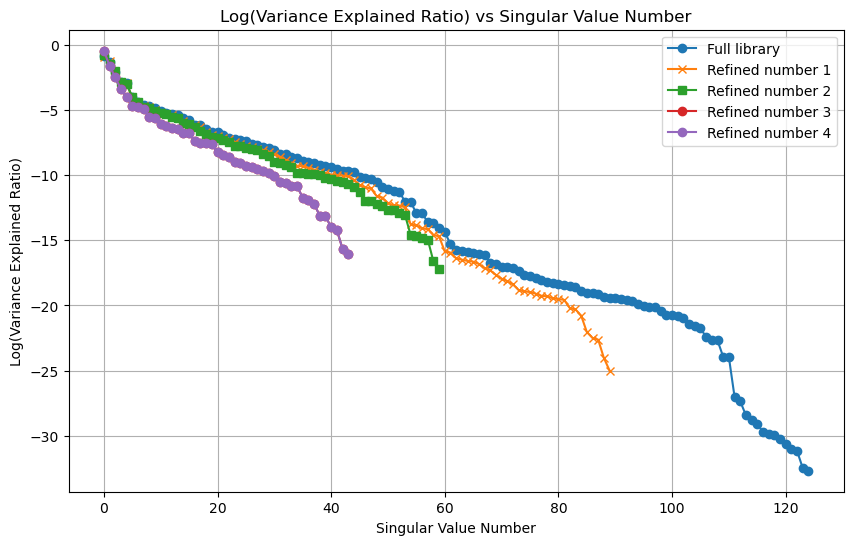

In [187]:
# Perform Singular Value Decomposition (SVD) on the candidate libraries
U_full, s_full, Vt_full = np.linalg.svd(candidate_lib_full, full_matrices=False)
U_refined_1, s_refined_1, Vt_refined_1 = np.linalg.svd(refined_candid_lib_1, full_matrices=False)
U_refined_2, s_refined_2, Vt_refined_2 = np.linalg.svd(refined_candid_lib_2, full_matrices=False)
U_refined_3, s_refined_3, Vt_refined_3 = np.linalg.svd(refined_candid_lib_3, full_matrices=False)
U_refined_4, s_refined_4, Vt_refined_4 = np.linalg.svd(refined_candid_lib_4, full_matrices=False)



# Calculate the explained variance ratio for the candidate libraries
explained_variance_ratio_full = (s_full ** 2) / np.sum(s_full ** 2)
explained_variance_ratio_refined_1 = (s_refined_1 ** 2) / np.sum(s_refined_1 ** 2)
explained_variance_ratio_refined_2 = (s_refined_2 ** 2) / np.sum(s_refined_2 ** 2)
explained_variance_ratio_refined_3 = (s_refined_3 ** 2) / np.sum(s_refined_3 ** 2)
explained_variance_ratio_refined_4 = (s_refined_4 ** 2) / np.sum(s_refined_4 ** 2)



# Plot the log of the explained variance ratio for all libraries
plt.figure(figsize=(10, 6))
plt.plot(np.log(explained_variance_ratio_full), marker='o', label='Full library')
plt.plot(np.log(explained_variance_ratio_refined_1), marker='x', label='Refined number 1')
plt.plot(np.log(explained_variance_ratio_refined_2), marker='s', label='Refined number 2')
plt.plot(np.log(explained_variance_ratio_refined_3), marker='o', label='Refined number 3')
plt.plot(np.log(explained_variance_ratio_refined_4), marker='o', label='Refined number 4')


plt.xlabel('Singular Value Number')
plt.ylabel('Log(Variance Explained Ratio)')
plt.title('Log(Variance Explained Ratio) vs Singular Value Number')
plt.legend()
plt.grid(True)

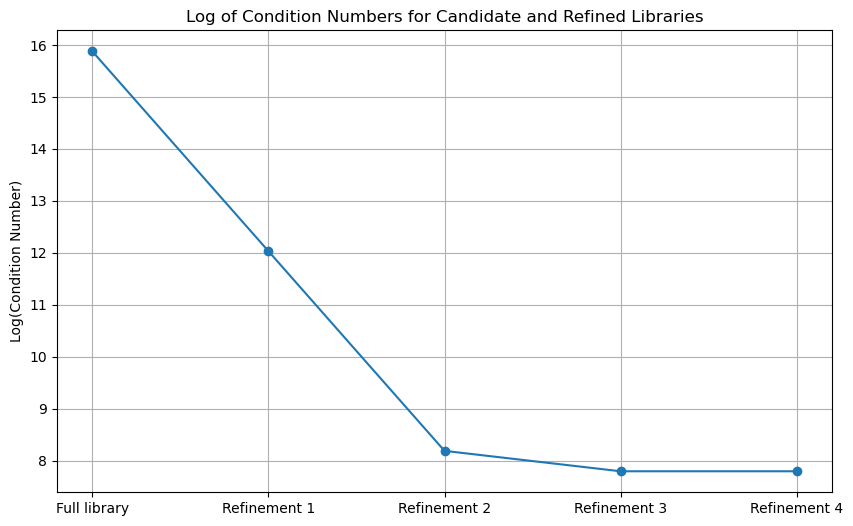

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the condition numbers
cond_numbers = [np.linalg.cond(lib) for lib in [candidate_lib_full, refined_candid_lib_1, refined_candid_lib_2,
                                                 refined_candid_lib_3, refined_candid_lib_4]]
# cond_num_full = np.linalg.cond(candidate_lib_full)
# cond_num_refined_1 = np.linalg.cond(refined_candid_lib_1)
# cond_num_refined_2 = np.linalg.cond(refined_candid_lib_2)
# cond_num_refined_3 = np.linalg.cond(refined_candid_lib_3)


# Plot the log of condition numbers
plt.figure(figsize=(10, 6))
plt.plot(["Full library","Refinement 1","Refinement 2", "Refinement 3", "Refinement 4"], np.log(cond_numbers), marker='o')
plt.ylabel('Log(Condition Number)')
plt.title('Log of Condition Numbers for Candidate and Refined Libraries')
plt.grid(True)
plt.show()
